#**Responsible AI Task  2**

##**Import all Required Libraries and Data sets**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

>>> **Importing Required Data from UCI Repository**

In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets




In [3]:
# Setting to Display all columns and Rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

##**Analysing imported data X and y**

In [4]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [5]:
X.tail()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States


In [6]:
X.shape

(48842, 14)

In [7]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

In [8]:
#replace value to delete fullstop in data
y =y.replace(['<=50K.','>50K.'],['<=50K','>50K'])
y.value_counts()

income
<=50K     37155
>50K      11687
dtype: int64

##**Finding Features with Categorical and Numerical data**






In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [10]:
data_dist = X.dtypes.value_counts()
data_dist

object    8
int64     6
dtype: int64

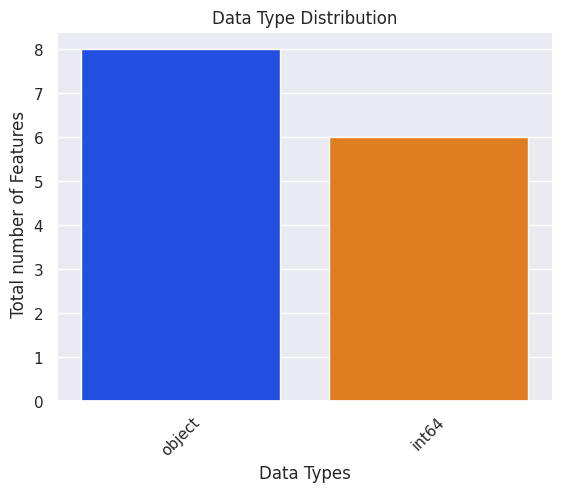

In [11]:
sns.set_theme()


sns.barplot(x=data_dist.keys(),y=data_dist,palette='bright' )
plt.xlabel('Data Types')

plt.ylabel(' Total number of Features')
plt.xticks(rotation=45)
plt.title('Data Type Distribution')
plt.show()


In [12]:
# Finding features having Numericals(integers and floats) value
num_feat = X.select_dtypes(include=('int64','float64'))
num_feat.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


In [13]:
num_feat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education-num   48842 non-null  int64
 3   capital-gain    48842 non-null  int64
 4   capital-loss    48842 non-null  int64
 5   hours-per-week  48842 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


In [14]:
num_feat_names = num_feat.keys()
num_feat_names

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [15]:
#Finding Features having only categorical data
cat_feat = X.select_dtypes(include=('object'))
cat_feat.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [16]:
cat_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       47879 non-null  object
 1   education       48842 non-null  object
 2   marital-status  48842 non-null  object
 3   occupation      47876 non-null  object
 4   relationship    48842 non-null  object
 5   race            48842 non-null  object
 6   sex             48842 non-null  object
 7   native-country  48568 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB


In [17]:
cat_feat_names =cat_feat.keys()
cat_feat_names

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


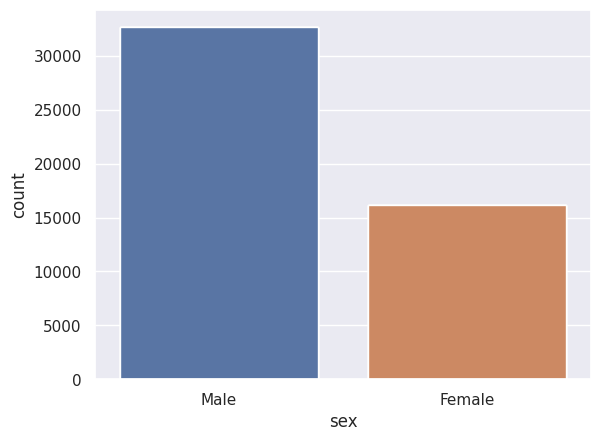

In [19]:
for col in cat_feat_names:
  sns.countplot(x = X['sex'])

##  Finding Missing Value

In [20]:
# Missing value present in features
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [21]:
# Missing value in Percentage
miss_featper = X.isnull().sum()/X.shape[0]*100
miss_featper

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
dtype: float64

<Axes: >

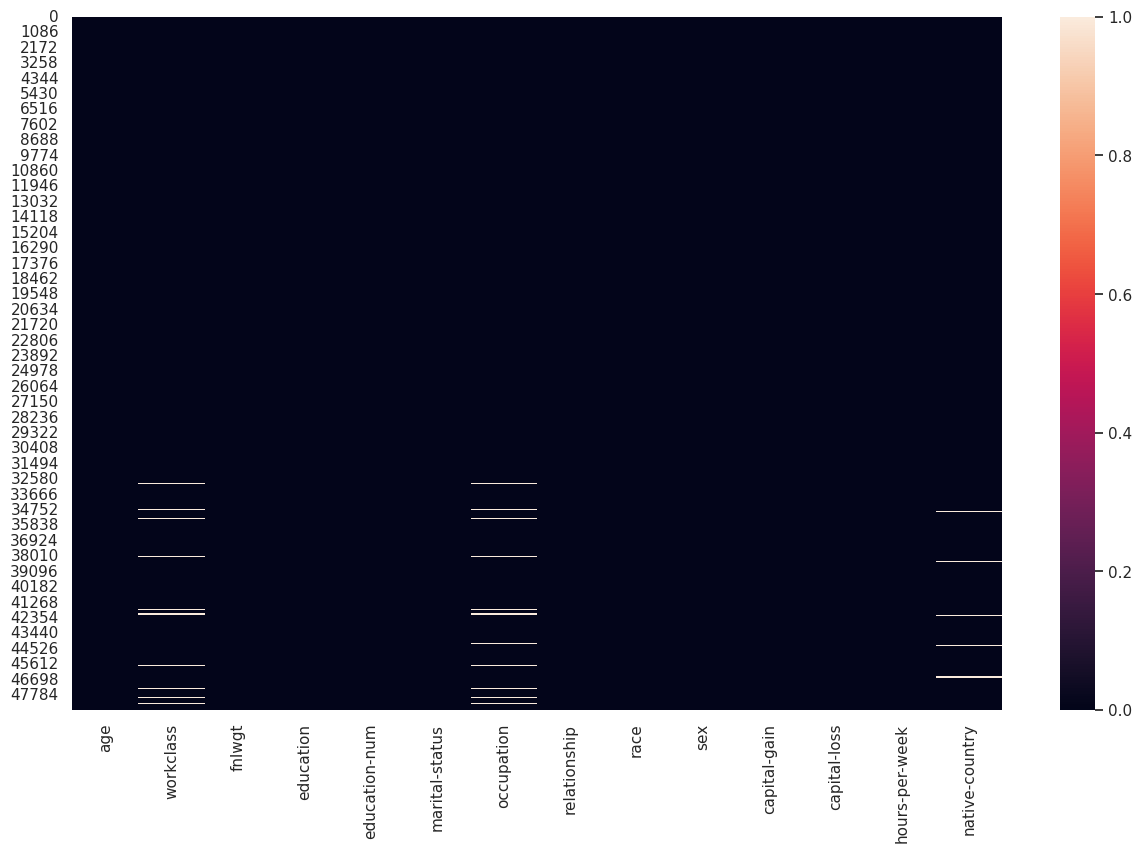

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(X.isnull())

<Figure size 1000x900 with 0 Axes>

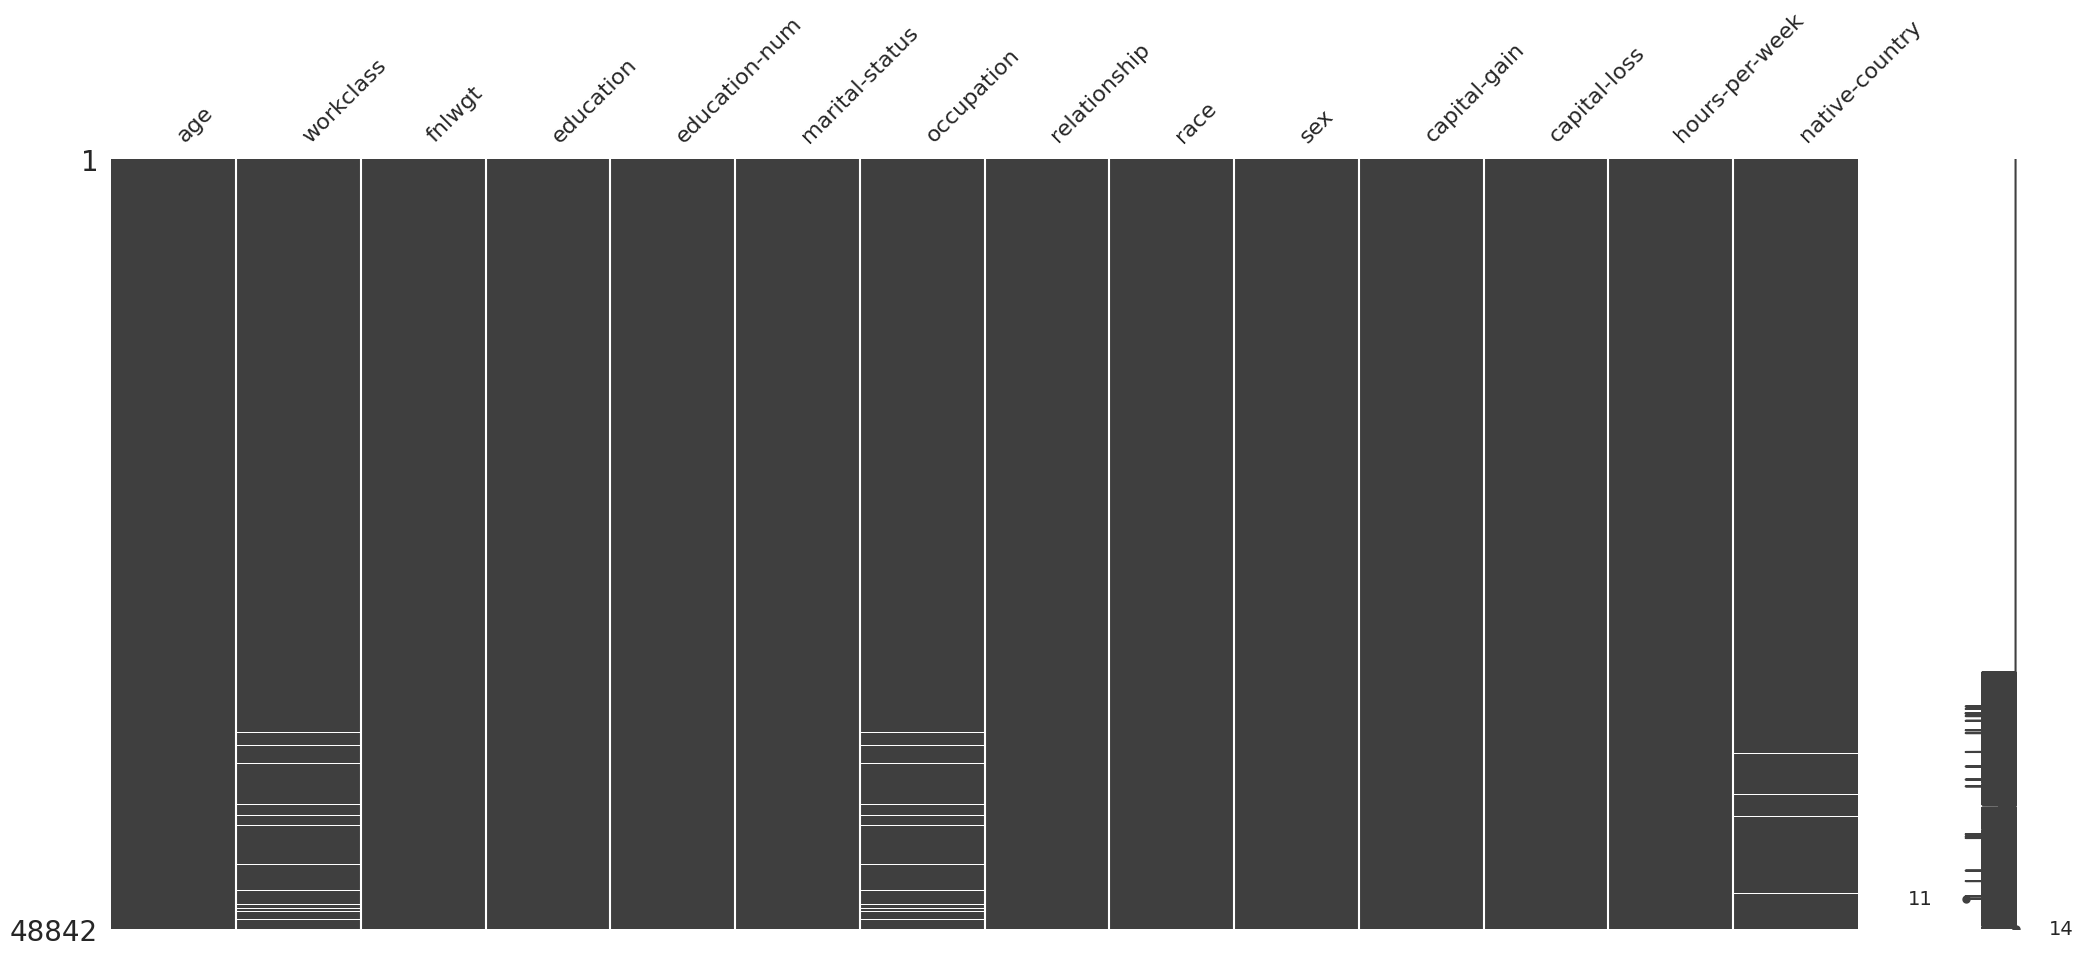

<Figure size 1000x900 with 0 Axes>

In [23]:
msno.matrix(X)
plt.figure(figsize=(10,9))

<ipython-input-24-32732e9236ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot = True)


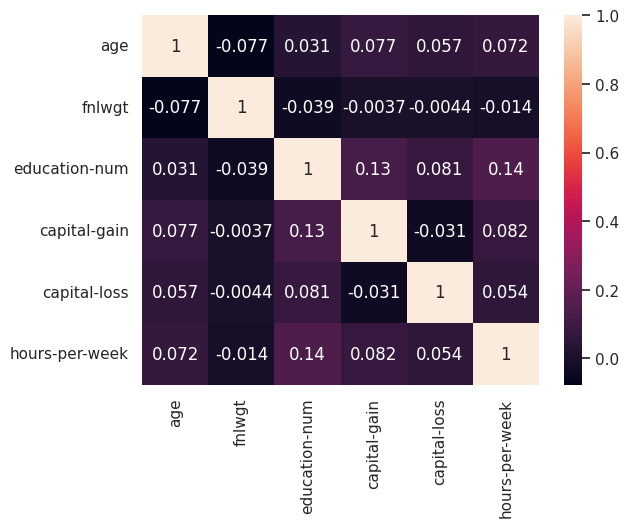

In [24]:
sns.set_theme()
sns.heatmap(X.corr(),annot = True)
plt.show()

## **Data Skewness**

In [25]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


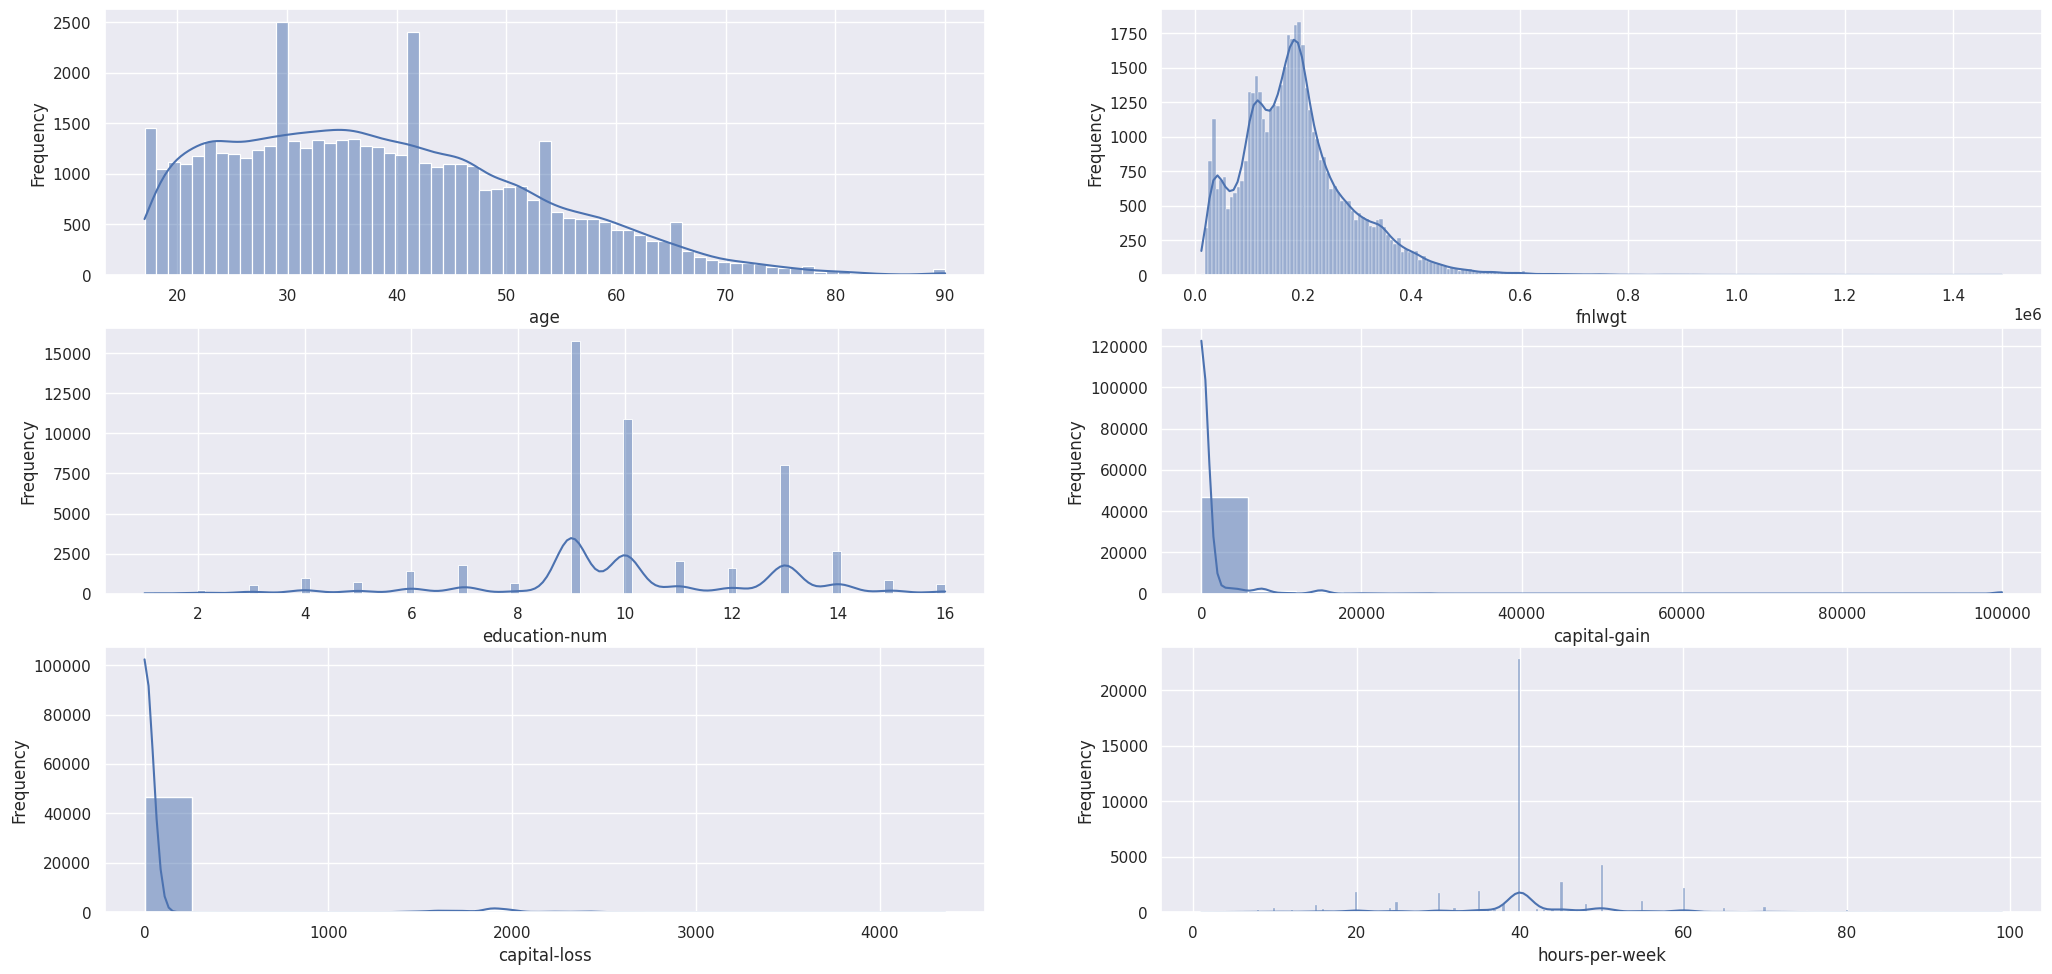

In [26]:

plt.figure(figsize=(25,20))

for i,col in  enumerate(num_feat_names):
  plt.subplot(5,2,i+1)
  sns.histplot(X[col],kde= True )
  plt.xlabel(col)
  plt.ylabel('Frequency')


<ipython-input-27-937dc67eae3b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.fillna(X.mean())


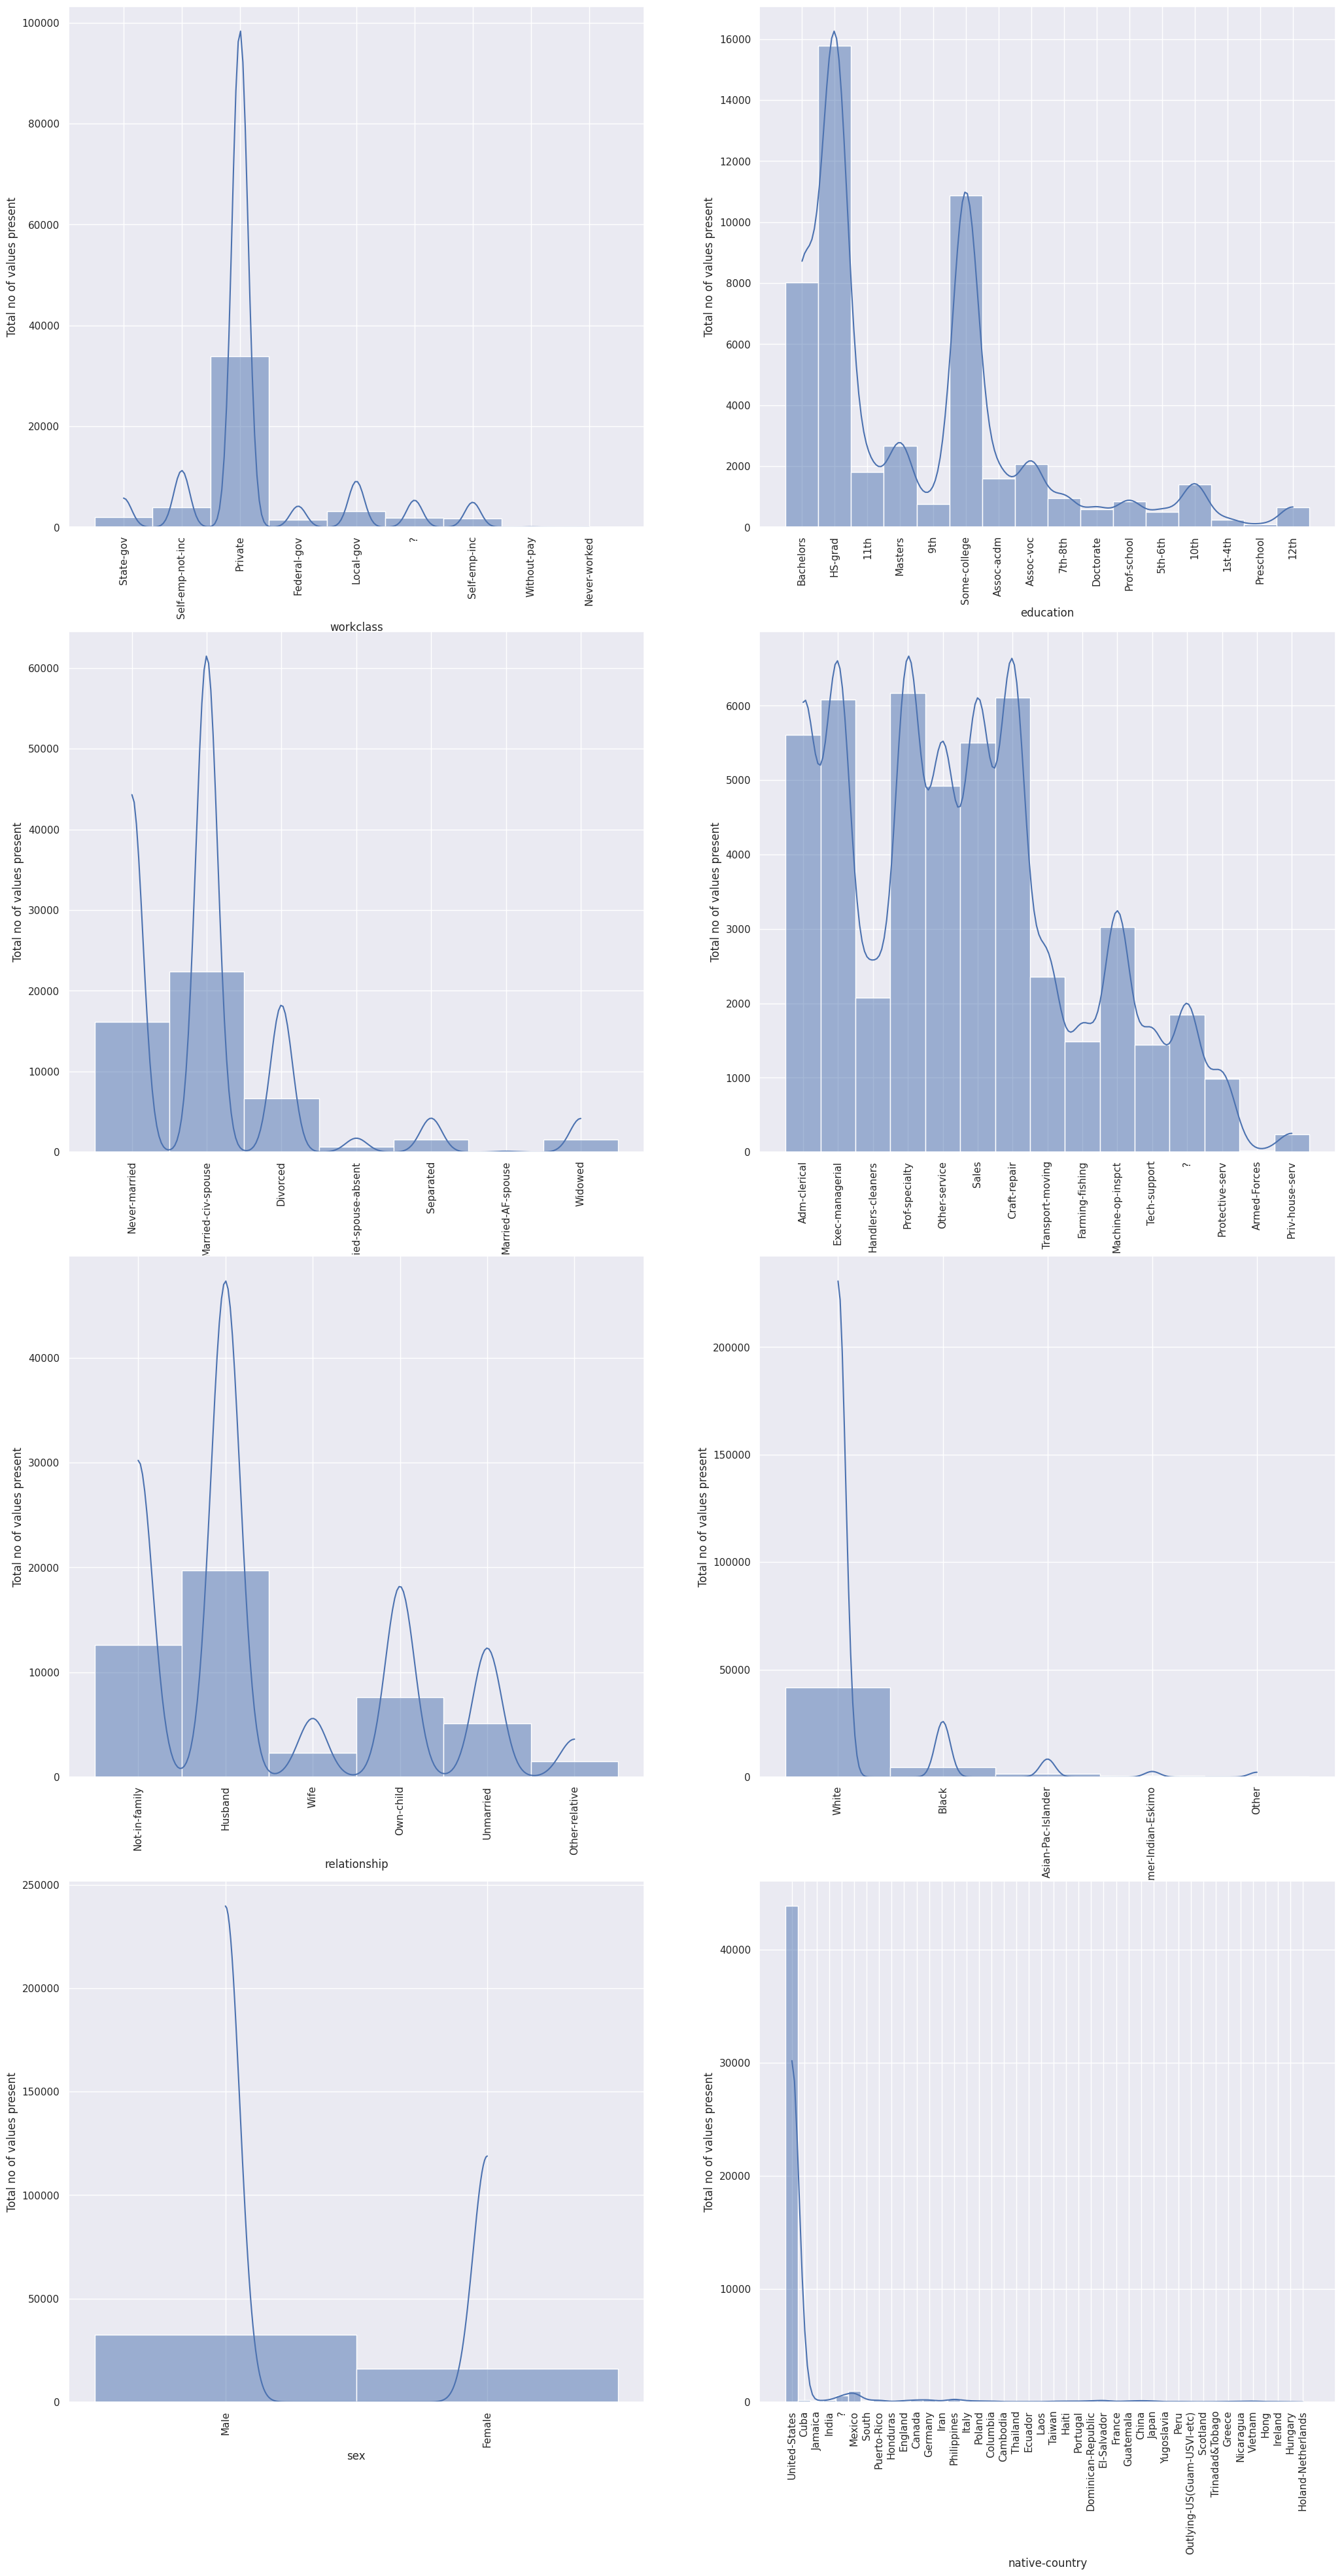

In [27]:
plt.figure(figsize=(25,60))

X.fillna(X.mean())
for i,col in  enumerate(cat_feat_names):
  plt.subplot(5,2,i+1)
  sns.histplot(X[col],kde= True )
  plt.xlabel(col)
  plt.xticks(rotation=90)
  plt.ylabel('Total no of values present')

In [28]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

## Relation Between Education and Income

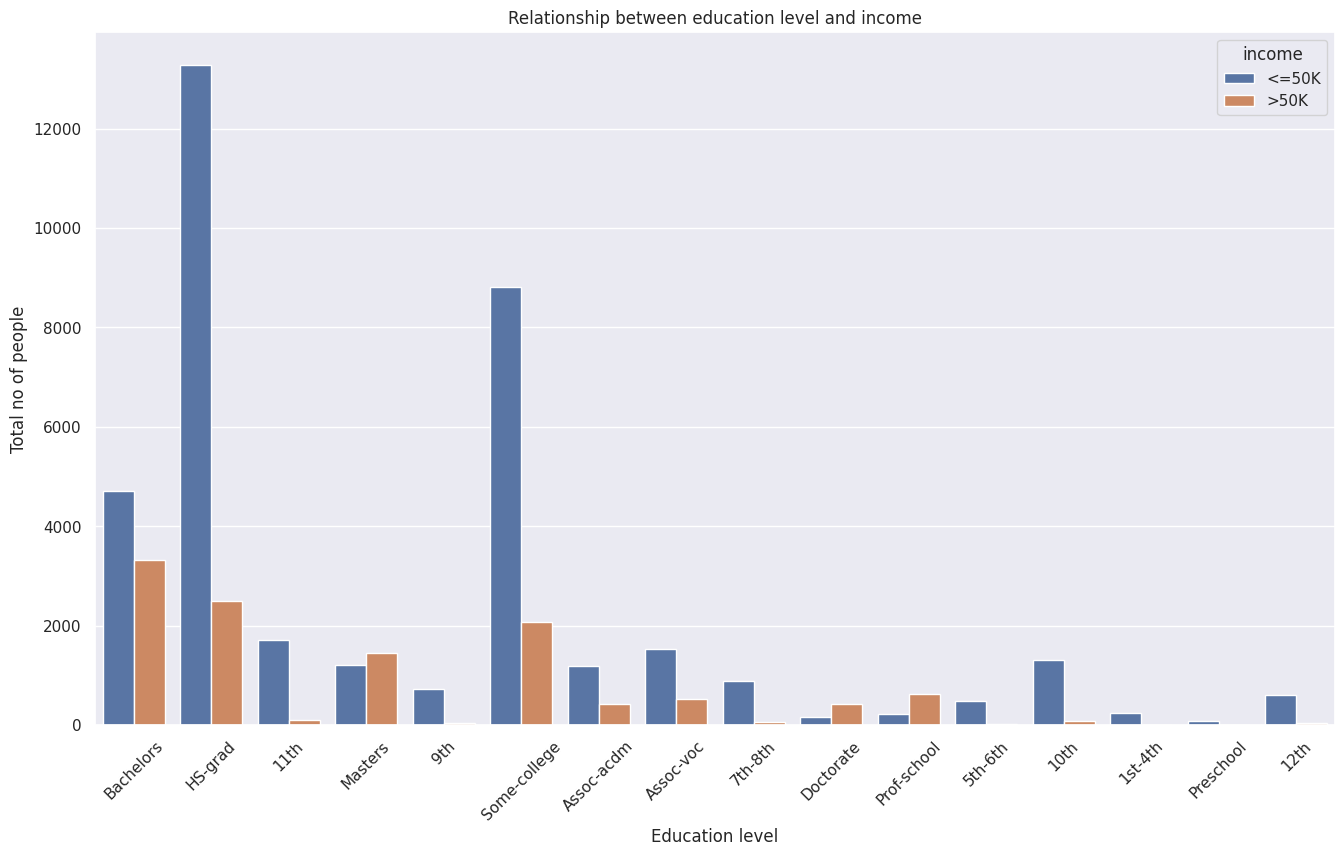

In [29]:
plt.figure(figsize=(16,9))
sns.countplot(x = X['education'],hue=y['income'])
plt.xticks(rotation=45)
plt.title('Relationship between education level and income')
plt.ylabel('Total no of people')
plt.xlabel('Education level')
plt.show()

In [30]:
X['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [31]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of the two variables
contingency_table = pd.crosstab(X['education'], y['income'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("chi2 statistic", chi2)
print("p-value", p)

chi2 statistic 6537.972961360963
p-value 0.0


##Relation Between Martial-status and sex

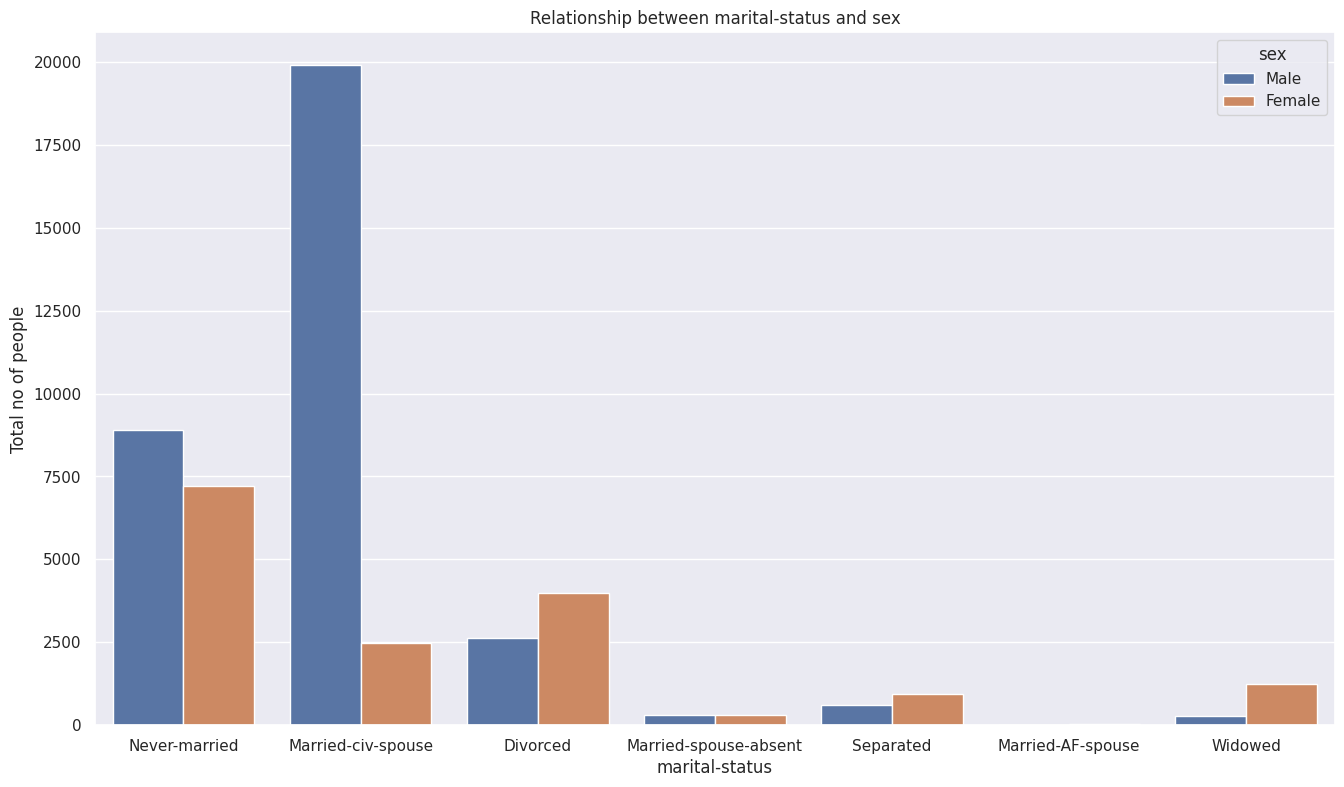

In [32]:
plt.figure(figsize=(16,9))
sns.countplot(x = X['marital-status'],hue=X['sex'])
#plt.xticks(rotation=90)
plt.title('Relationship between marital-status and sex')
plt.ylabel('Total no of people')
plt.xlabel('marital-status')
plt.show()

#Responsible AI Task 3

## Download and Import all Required libraries and Datasets

In [33]:
!pip install ucimlrepo
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.5 MB/s eta 0:00:00


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures

In [35]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

##Analyzing the uploaded Data

In [36]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [37]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [38]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [39]:
y.value_counts()

num
0      164
1       55
2       36
3       35
4       13
dtype: int64

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [41]:
X.shape

(303, 13)

In [42]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [43]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [44]:
y.head(10)

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [45]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


## Finding Missing value

<Axes: >

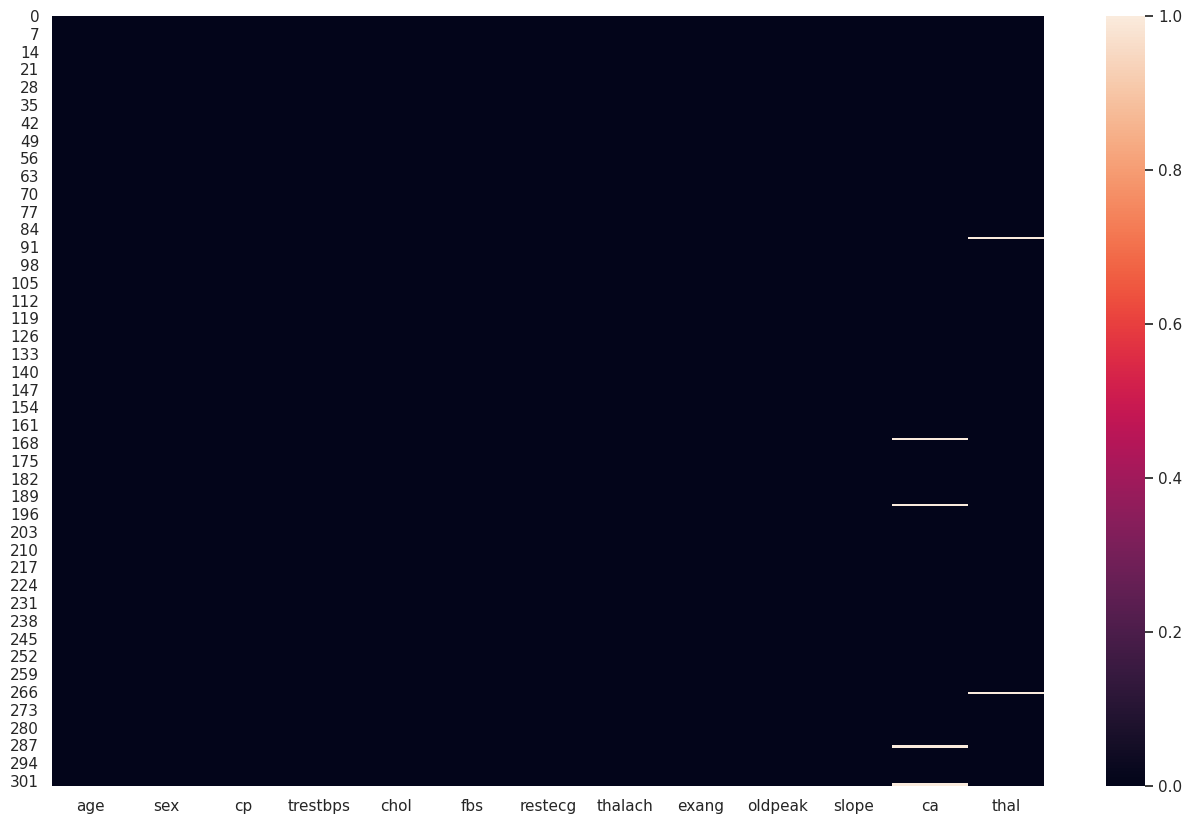

In [46]:
plt.figure(figsize=(16,10))
sns.heatmap(X.isnull())

<Axes: >

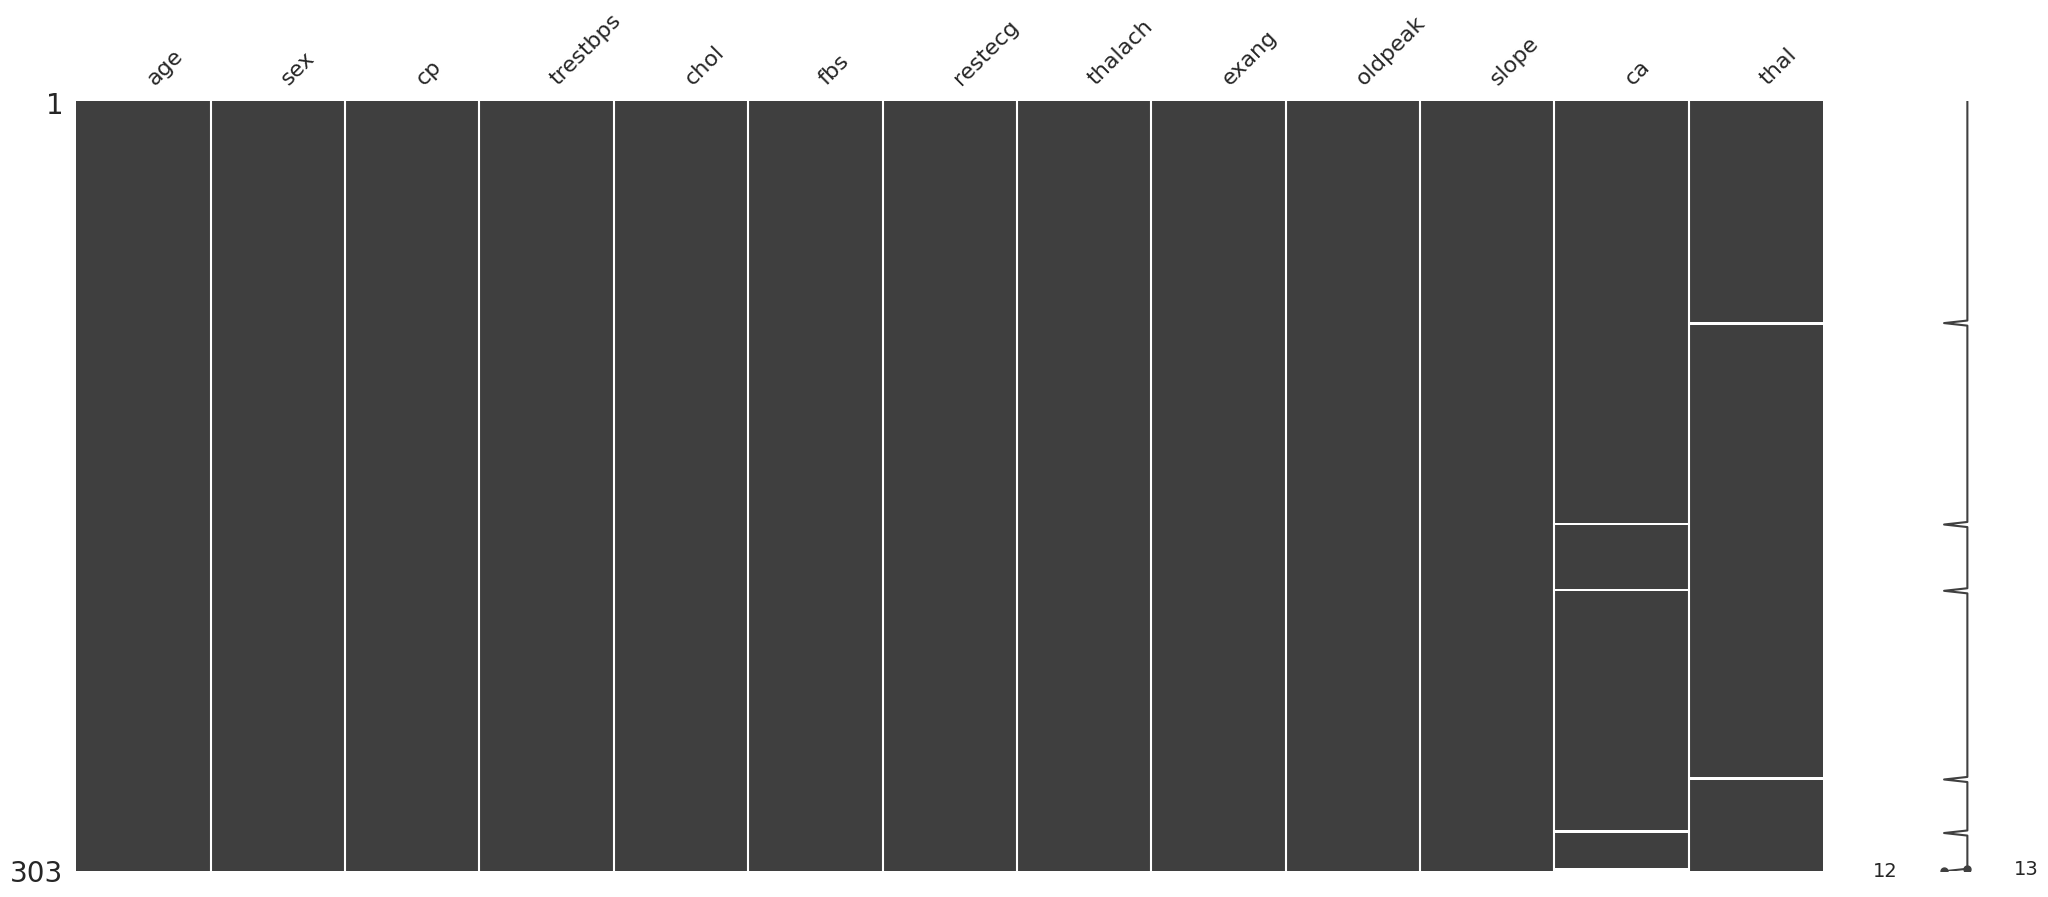

In [47]:
msno.matrix(X)

In [48]:
miss_percent = X.isnull().sum()/X.shape[0]*100
miss_percent

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
dtype: float64

In [49]:
col_names=X.keys()

## Analysing Data skewness and Outiliers

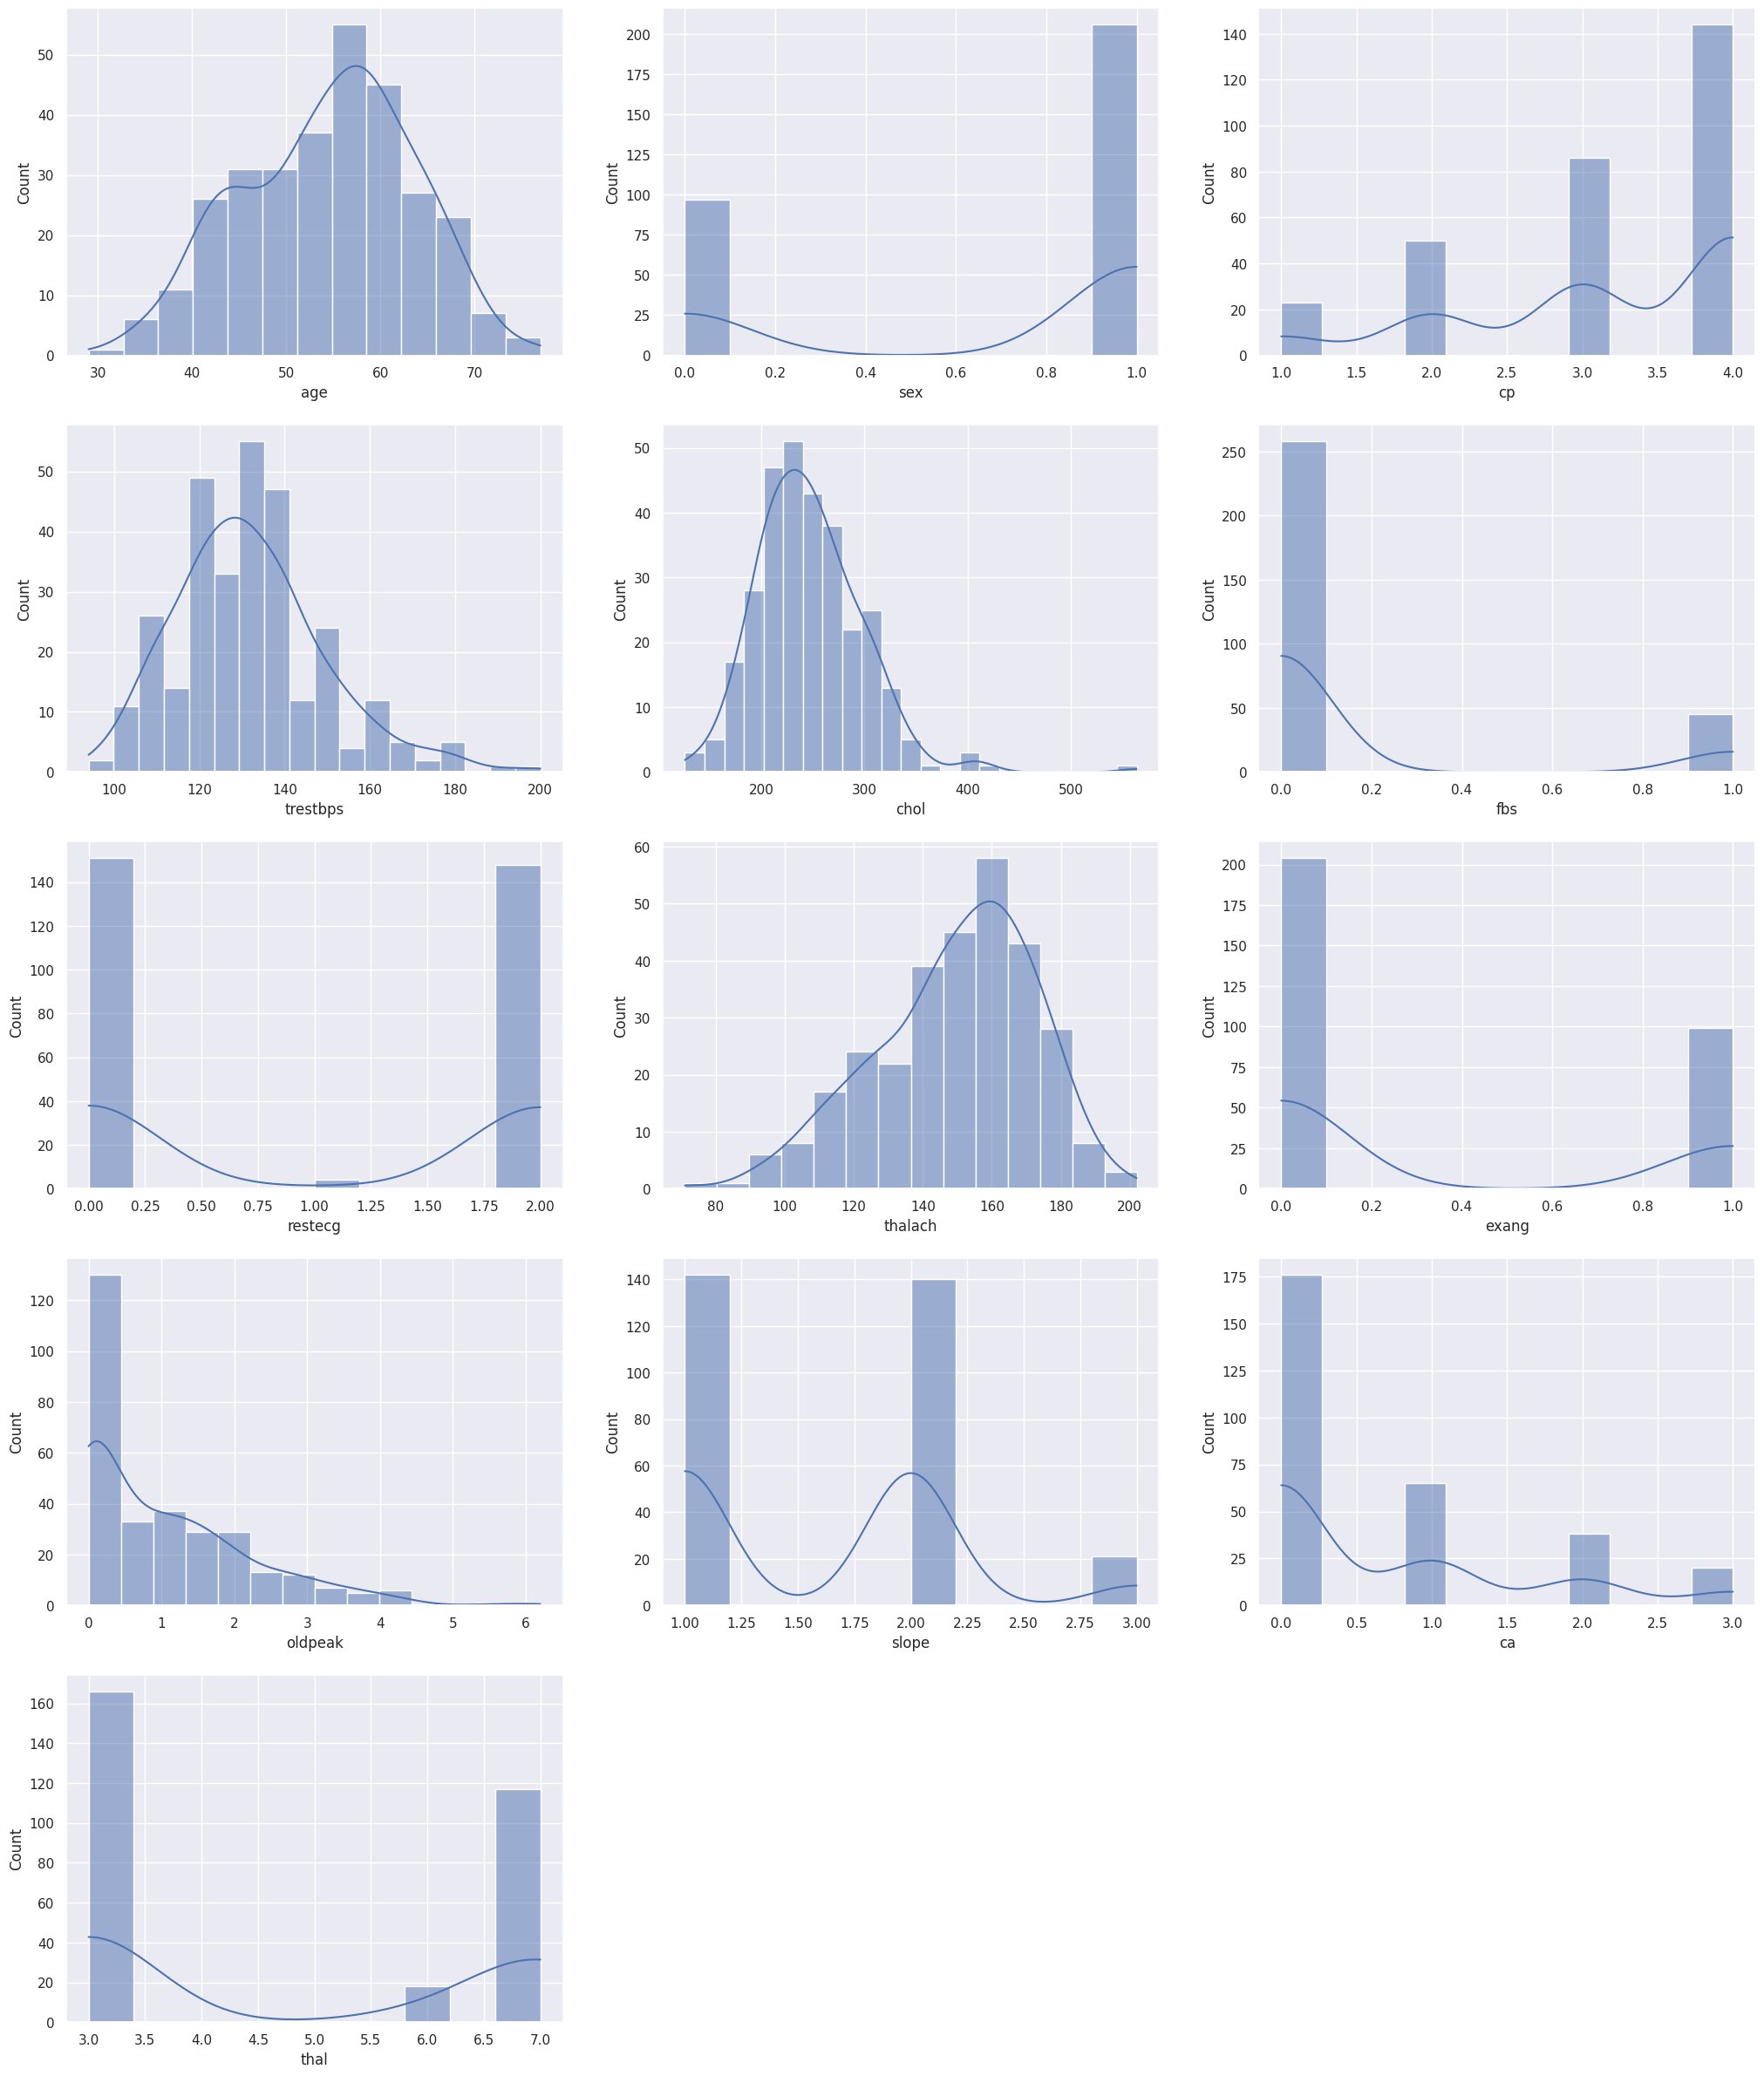

In [50]:
plt.figure(figsize=(25,30))
sns.set_theme()
for i,col in enumerate(col_names):

  plt.subplot(5,3,i+1)
  sns.histplot(X[col],kde=True)

In [51]:
X_copy = X.copy()

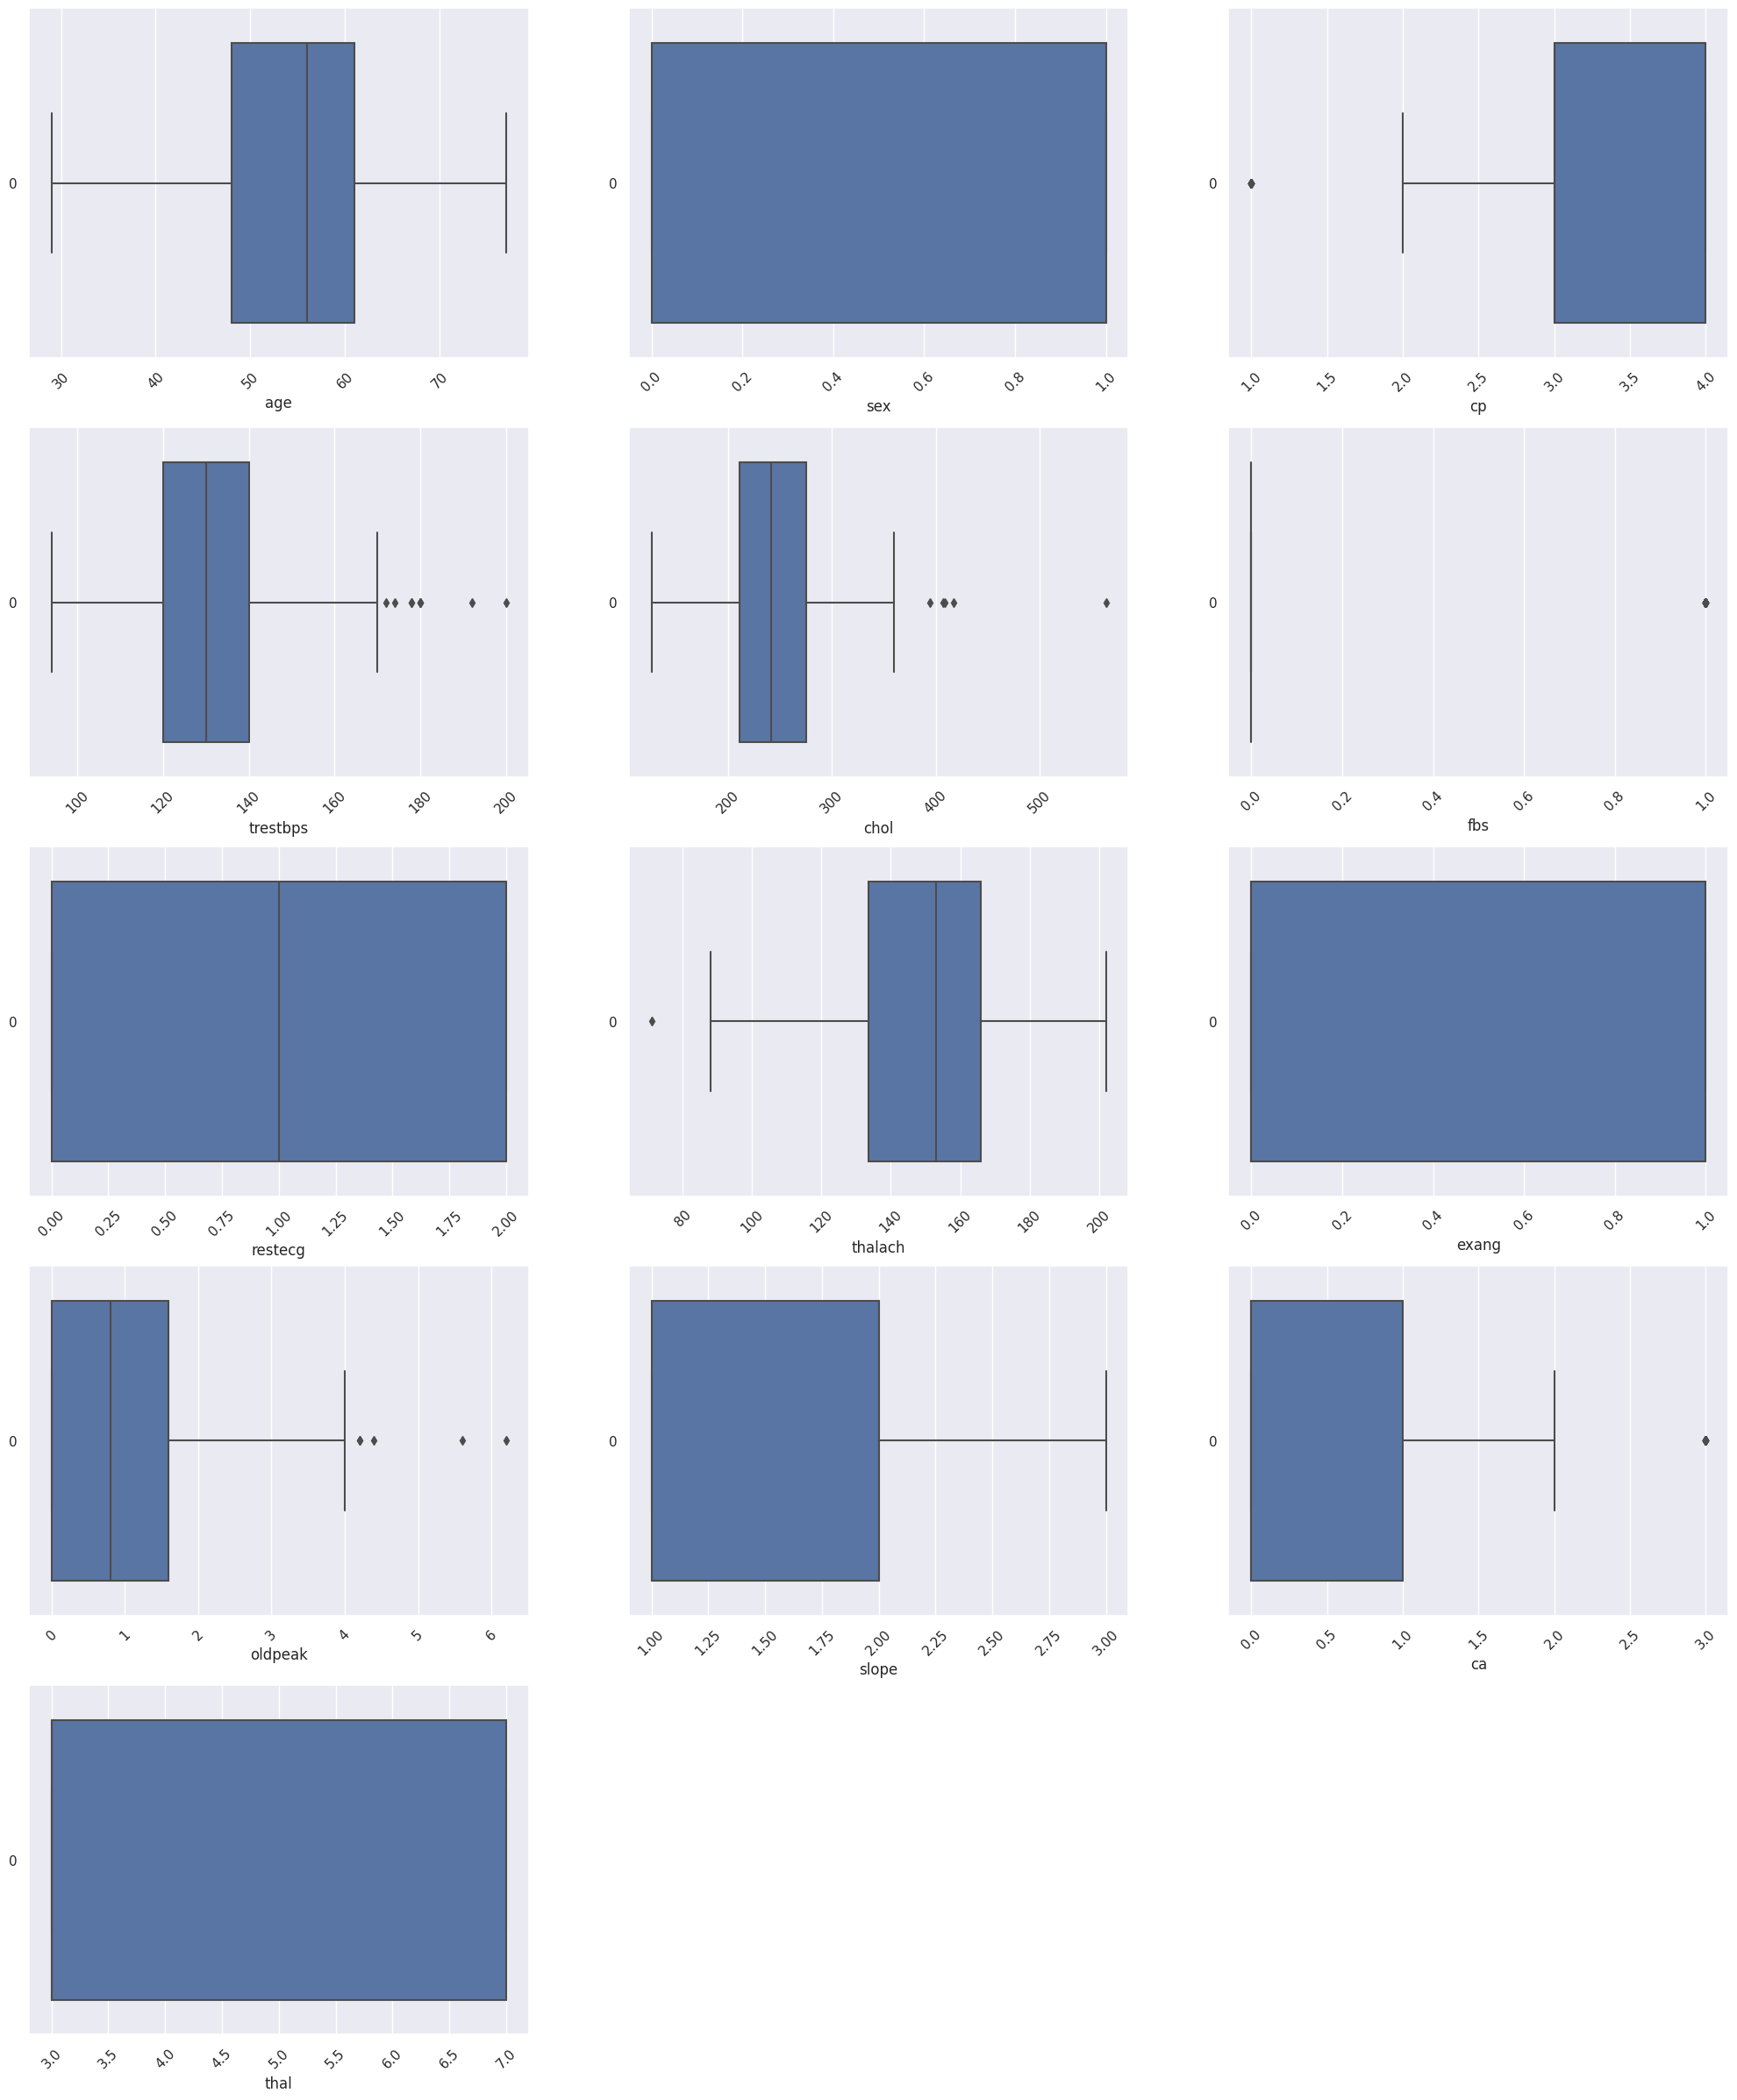

In [52]:
#outlier
plt.figure(figsize=(25,30))
for i,col in enumerate(X.keys()):
  plt.subplot(5,3,i+1)
  sns.boxplot(X[col],orient= 'h')
  plt.xlabel(col)
  plt.xticks(rotation=45)

##Missing value Imputation

In [53]:
# Missing value Imputation
print('Missing value impute with mean value in ca is',X['ca'].mean().round())
X_copy['ca']= X['ca'].fillna(X['ca'].mean().round())

Missing value impute with mean value in ca is 1.0


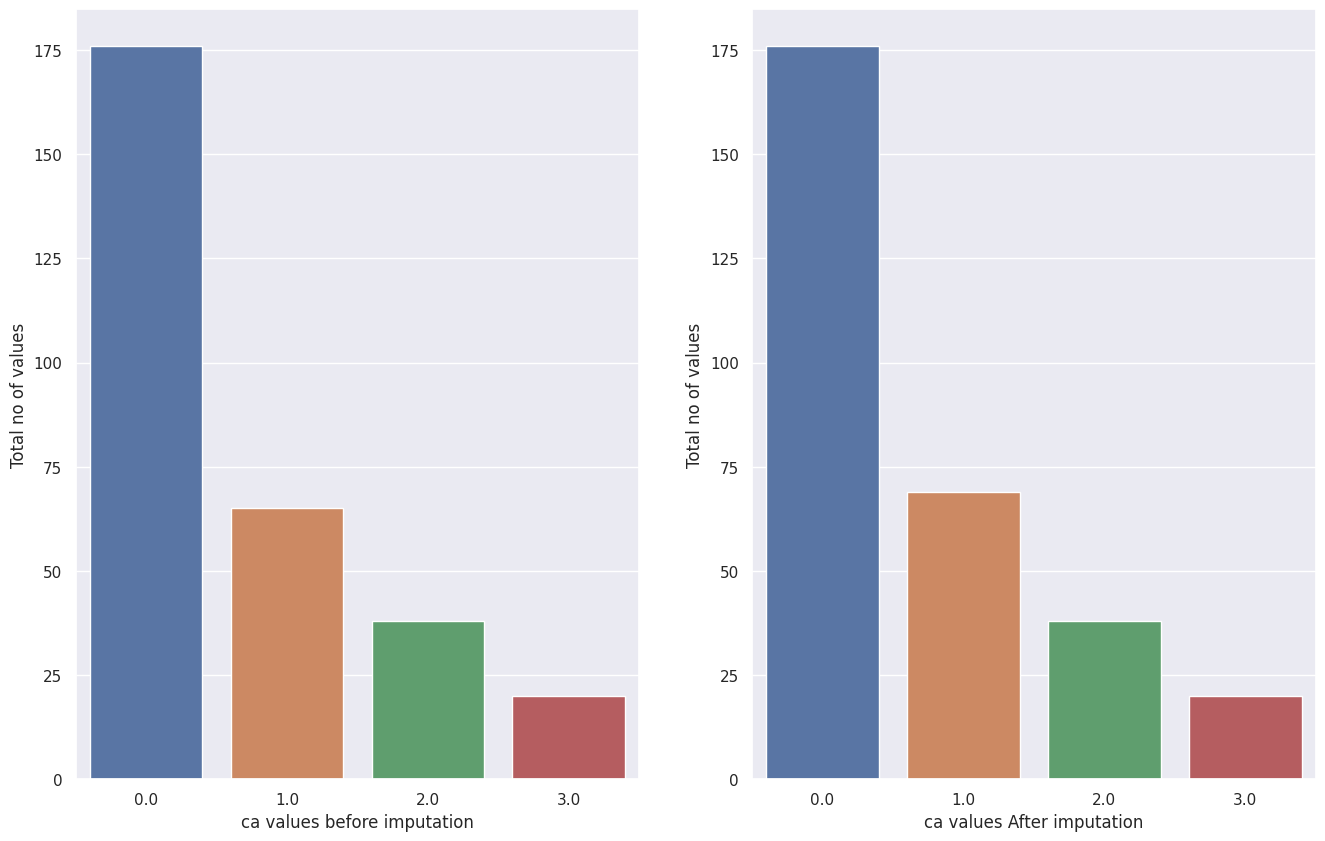

In [54]:

plt.figure(figsize=(16,10))
plt.subplot(121)
sns.countplot(data=X,x=X['ca'])
plt.xlabel('ca values before imputation')
plt.ylabel('Total no of values')
plt.subplot(122)
sns.countplot(data=X_copy,x=X_copy['ca'])
plt.xlabel('ca values After imputation')
plt.ylabel('Total no of values')
plt.show()
#plt.title('Comparision of data Before and After Imputation')

In [55]:
print('Missing value in thal impute with mean value',X['thal'].median())
X_copy['thal']= X['thal'].fillna(X['thal'].median())

Missing value in thal impute with mean value 3.0


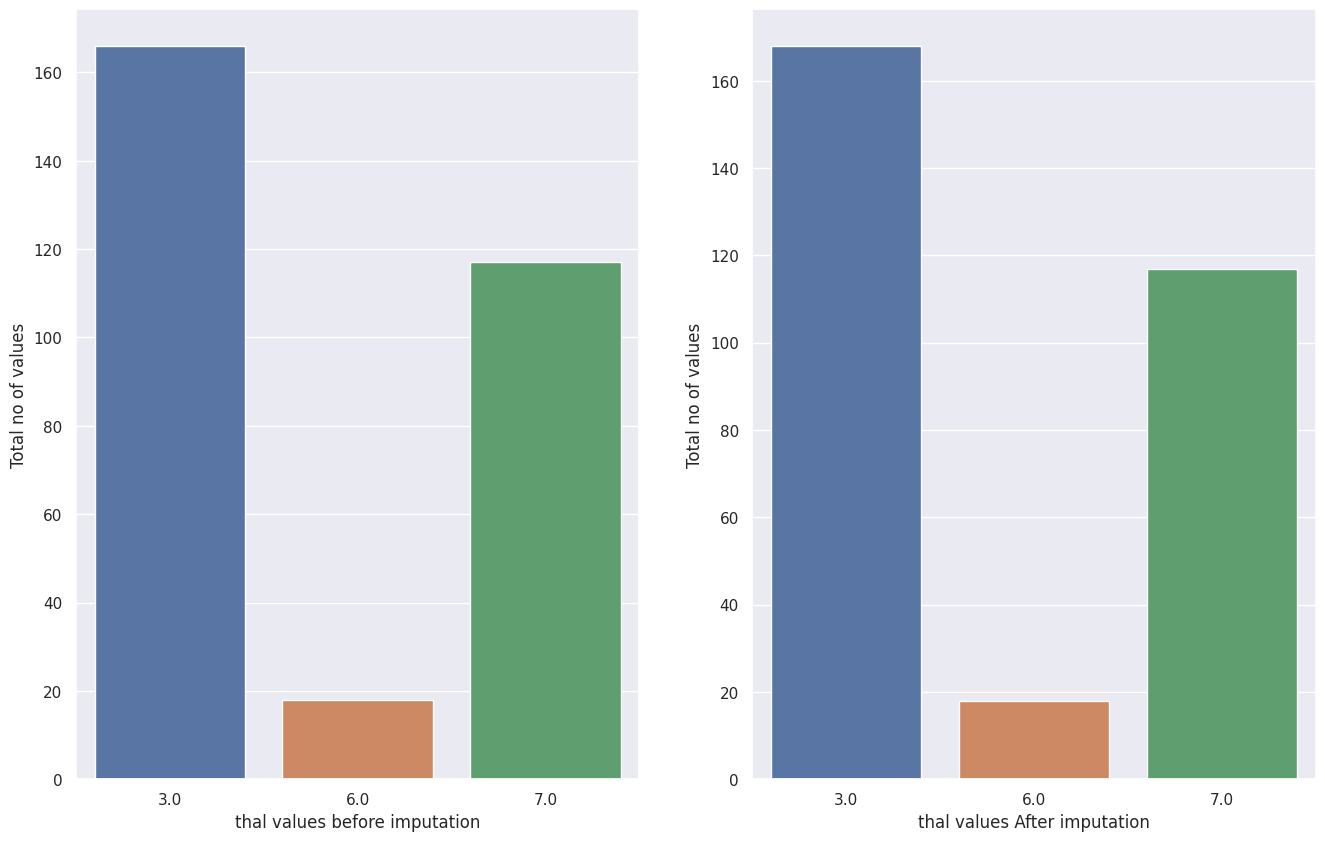

In [56]:
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.countplot(data=X,x=X['thal'])
plt.xlabel('thal values before imputation')
plt.ylabel('Total no of values')
plt.subplot(122)
sns.countplot(data=X_copy,x=X_copy['thal'])
plt.xlabel('thal values After imputation')
plt.ylabel('Total no of values')
plt.show()
#plt.title('Comparision of data Before and After Imputation')

##Feature Engineering

In [57]:
# Asper Domain knowledge data can distribute in numerical and categorical features

In [58]:
#cateorical Feature
cat_feature =['sex','cp','fbs','restecg','exang','slope','thal']

In [59]:
X_copy[cat_feature].head(10)

,sex,cp,fbs,restecg,exang,slope,thal
0,1,1,1,2,0,3,6.0
1,1,4,0,2,1,2,3.0
2,1,4,0,2,1,2,7.0
3,1,3,0,0,0,3,3.0
4,0,2,0,2,0,1,3.0
5,1,2,0,0,0,1,3.0
6,0,4,0,2,0,3,3.0
7,0,4,0,0,1,1,3.0
8,1,4,0,2,0,2,7.0
9,1,4,1,2,1,3,7.0


In [60]:
for col in cat_feature:
  print(col,'having uniques are',X_copy[col].unique())

sex having uniques are [1 0]
cp having uniques are [1 4 3 2]
fbs having uniques are [1 0]
restecg having uniques are [2 0 1]
exang having uniques are [0 1]
slope having uniques are [3 2 1]
thal having uniques are [6. 3. 7.]


In [61]:
#converting categorical values

In [62]:
#restecg

In [63]:
X_copy['restecg']= X['restecg'].map({0:1,1:2,2:3})
X_copy['restecg'].unique()

array([3, 1, 2])

In [64]:
#thal

In [65]:
X_copy['thal']= X_copy['thal'].astype(int)

In [66]:
X_copy['thal'].isnull().sum()

0

In [67]:
X_copy.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

##Training the Models

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X_copy,y,test_size=0.2,random_state=100)

In [69]:
X_train.shape

(242, 13)

In [70]:
y_train.shape

(242, 1)

In [71]:
y_train =np.ravel(y_train)
y_train.shape

(242,)

In [72]:
sc = StandardScaler()
sc.fit(X_train)
X_trainsc = sc.transform(X_train)
X_testsc = sc.transform(X_test)

In [73]:
lgr= LogisticRegression()
lgr.fit(X_trainsc,y_train)
lgr.score(X_testsc,y_test)

0.7049180327868853

In [74]:
y_predict =lgr.predict(X_testsc)

Text(46.25, 0.5, 'Actual Label')

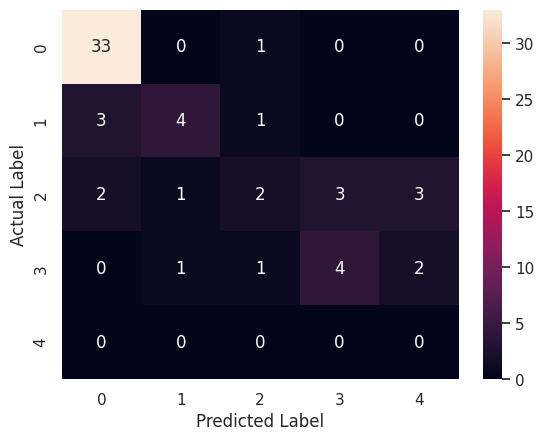

In [88]:
conf=confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot= True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [85]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.50      0.67      0.57         6
           2       0.18      0.40      0.25         5
           3       0.50      0.57      0.53         7
           4       0.00      0.00      0.00         5

    accuracy                           0.70        61
   macro avg       0.43      0.50      0.45        61
weighted avg       0.73      0.70      0.71        61



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


##Finding SHAP values and Visualization

In [76]:
# Calculate the SHAP values
explainer = shap.LinearExplainer(lgr,X_train)
shap_values = explainer(X_test)


In [77]:
shap_values

.values =
array([[[-5.01344182e-01, -2.07150213e-01, -1.11900046e+00,
          3.65158795e+00, -1.82409309e+00],
        [-1.28235280e-01,  6.75965114e-03,  3.39978502e-03,
         -6.36047099e-03,  1.24436315e-01],
        [ 1.27557610e-01,  2.61742955e-02, -1.19662317e-01,
         -8.57512077e-03, -2.54944673e-02],
        ...,
        [-1.40218224e-01, -2.15594102e-02, -1.14618607e-02,
          7.93584538e-02,  9.38810414e-02],
        [ 6.35775235e-01,  8.91371379e-02, -5.92967767e-02,
         -2.53352991e-01, -4.12262605e-01],
        [ 1.19896738e+00,  1.88849317e-01, -3.53415631e-01,
         -5.59007264e-01, -4.75393799e-01]],

       [[ 9.54941300e-02,  3.94571834e-02,  2.13142944e-01,
         -6.95540561e-01,  3.47446304e-01],
        [-1.28235280e-01,  6.75965114e-03,  3.39978502e-03,
         -6.36047099e-03,  1.24436315e-01],
        [-5.43798232e-01, -1.11585154e-01,  5.10139353e-01,
          3.65570938e-02,  1.08686940e-01],
        ...,
        [-1.40218224e-01, 

In [78]:
shap_values.shape

(61, 13, 5)

In [79]:
preds =lgr.predict(X_test)
import copy
shap_values2 = copy.deepcopy(shap_values)  # Creates a separate copy

new_shapval =[]
for i,pred in enumerate(preds):
  new_shapval.append(shap_values.values[i][:,pred])

shap_values2.values = np.array(new_shapval)
print(shap_values2.shape)

(61, 13)


X has feature names, but LogisticRegression was fitted without feature names


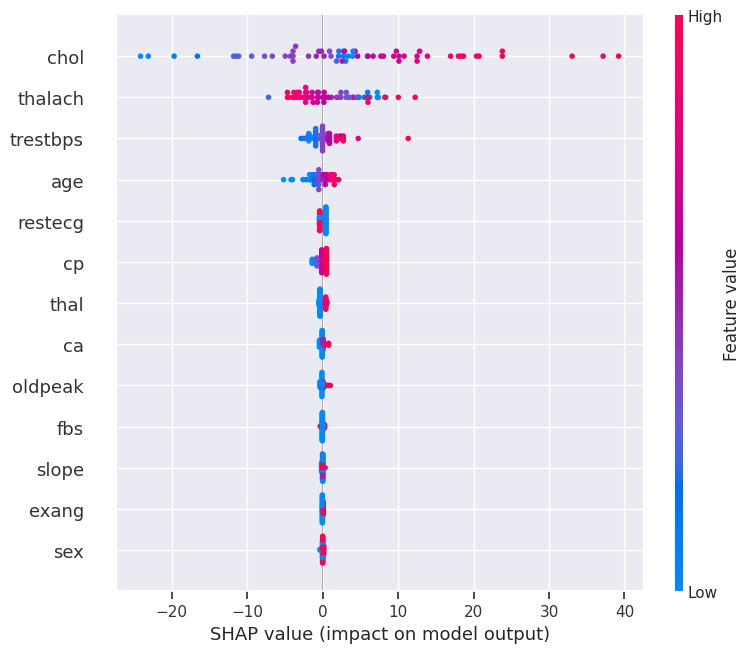

In [80]:
shap.summary_plot(shap_values2, X_test)

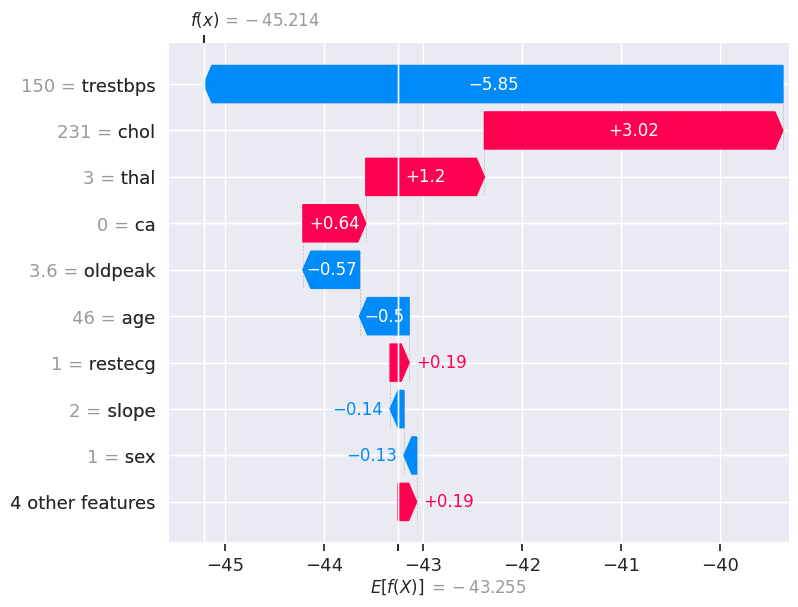

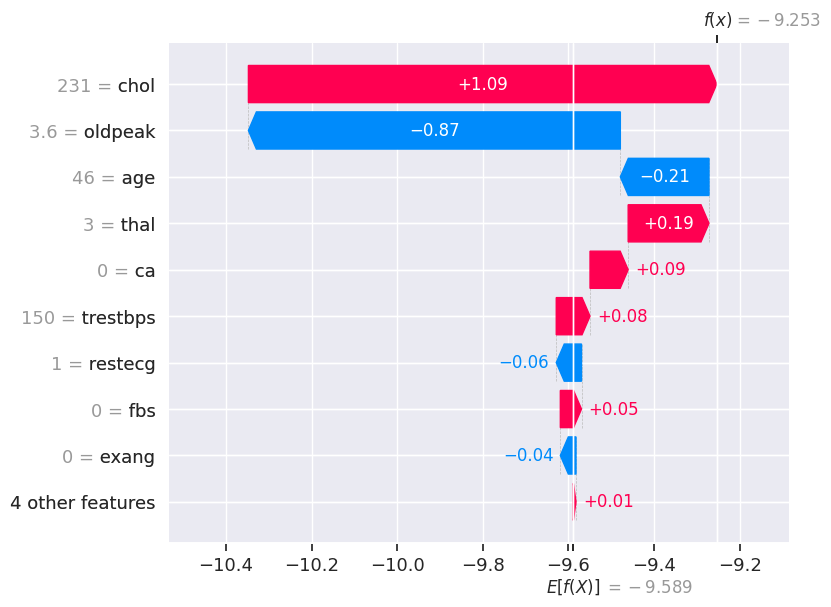

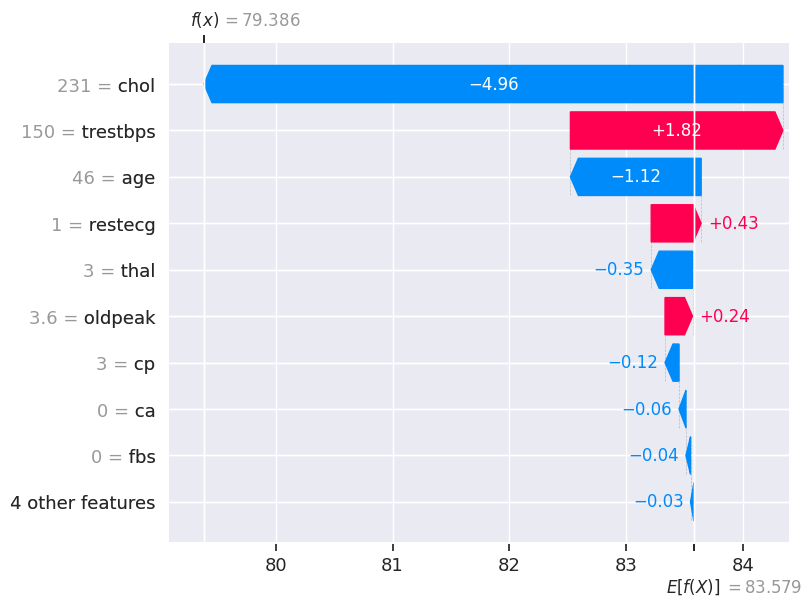

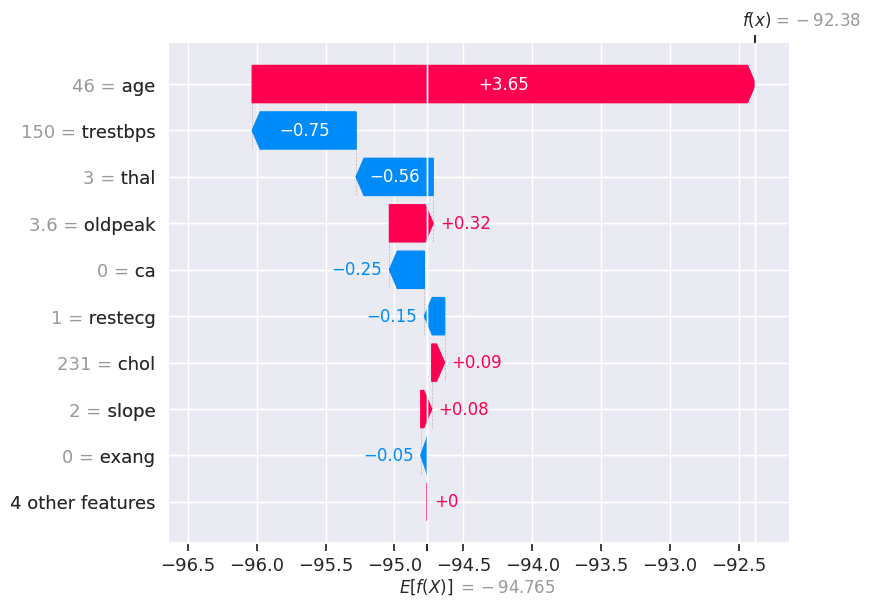

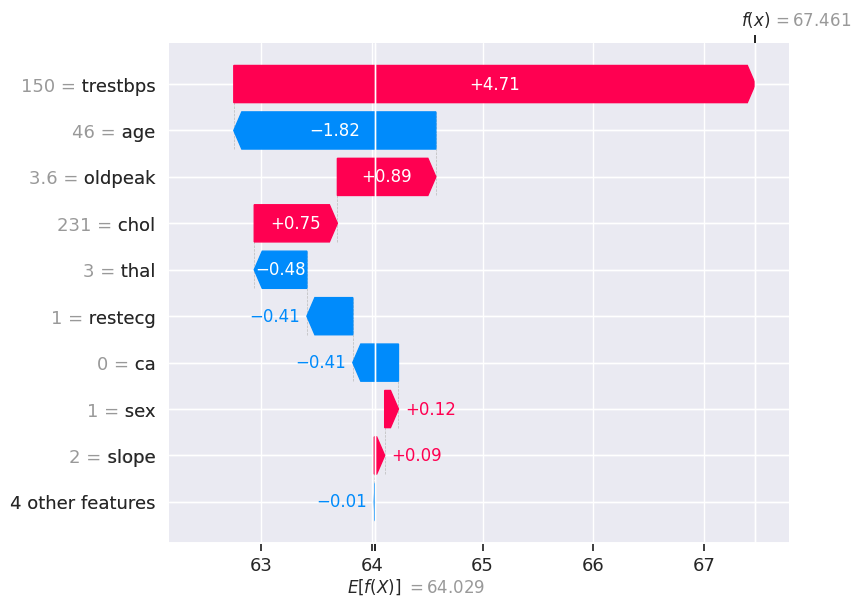

In [81]:
# Plot the SHAP summary plot

# waterfall shap value for 1 observation
shap.plots.waterfall(shap_values[0,:,0])

# waterfall shap value for 2 observation
shap.plots.waterfall(shap_values[0,:,1])

# waterfall shap value for 3 observation
shap.plots.waterfall(shap_values[0,:,2])

# waterfall shap value for 4 observation
shap.plots.waterfall(shap_values[0,:,3])

# waterfall shap value for 5 observation
shap.plots.waterfall(shap_values[0,:,4])


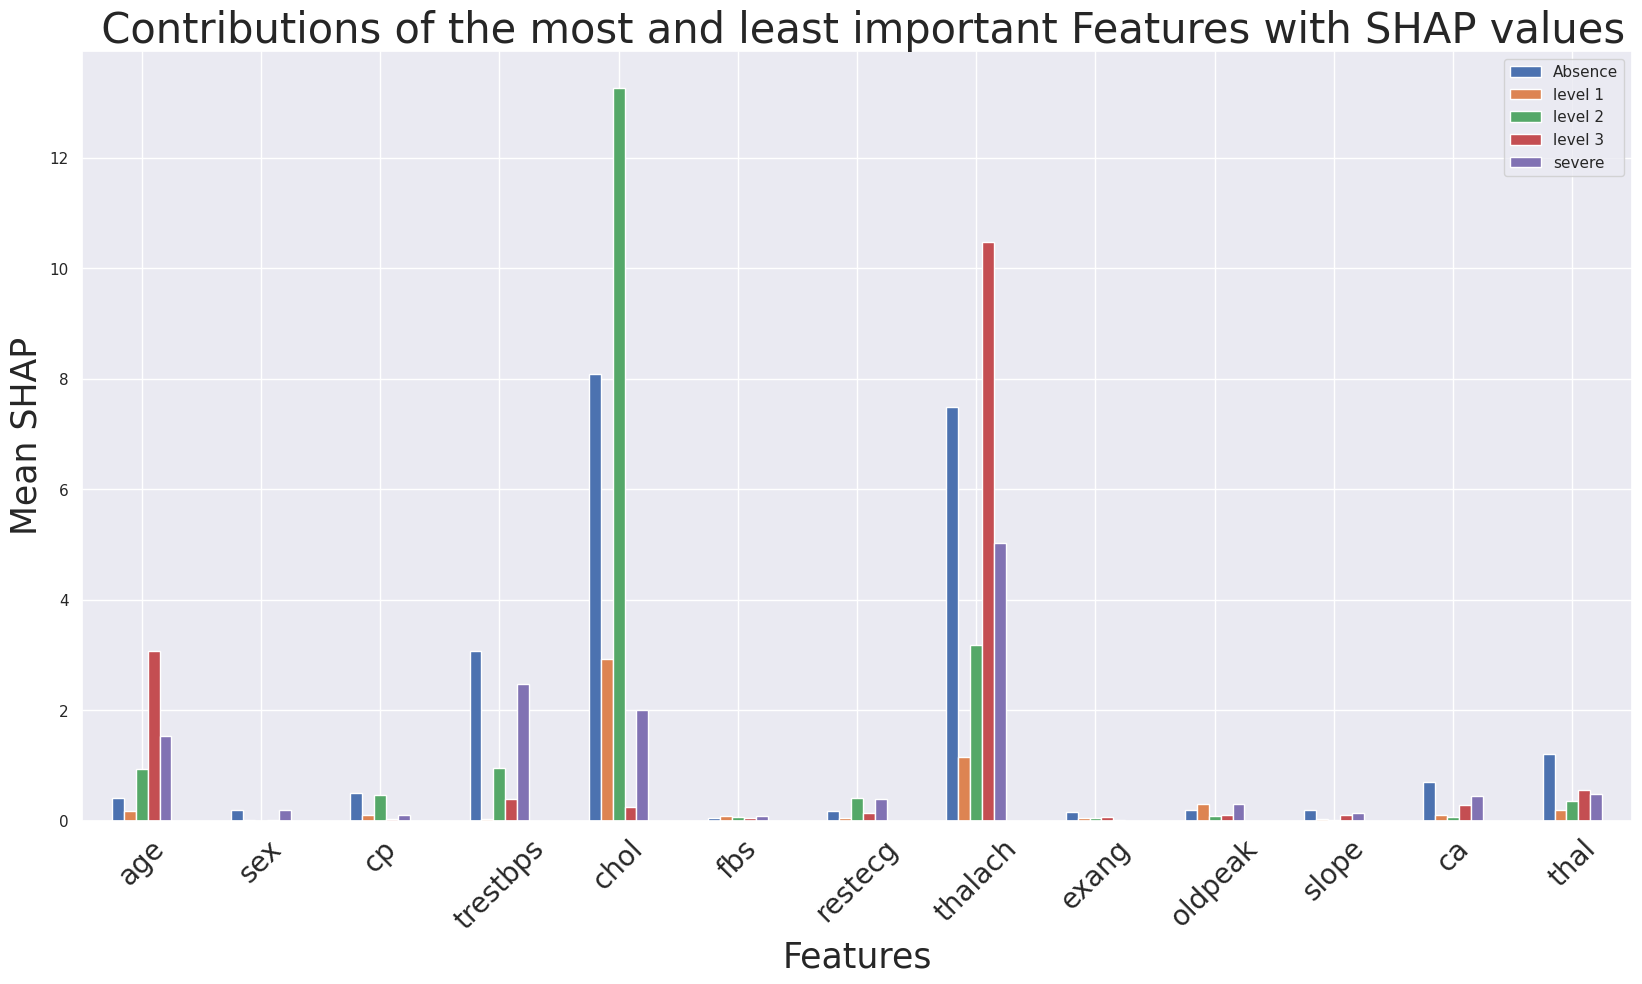

In [82]:
# Calculate the feature importance scores

mean_class0 = np.mean(np.abs(shap_values.values[:,:,0]), axis=0)
mean_class1 = np.mean(np.abs(shap_values.values[:,:,1]), axis=0)
mean_class2 = np.mean(np.abs(shap_values.values[:,:,2]), axis=0)
mean_class3 = np.mean(np.abs(shap_values.values[:,:,3]), axis=0)
mean_class4 = np.mean(np.abs(shap_values.values[:,:,4]), axis=0)

df= pd.DataFrame({"Absence":mean_class0,"level 1":mean_class1,"level 2":mean_class2,"level 3":mean_class3,"severe":mean_class4})

# Plot the feature importance scores
fig,ax=plt.subplots(1,1,figsize =(20,10))
ax.set_ylabel('Mean SHAP',size =25)
ax.set_xlabel('Features',size =25)


plt.title(' Contributions of the most and least important Features with SHAP values',size=30)
df.plot.bar(ax=ax)
ax.set_xticklabels(labels=X.columns,size =20,rotation =45)
plt.show()